# 4. Learning Curves

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from mclearn.classifier import (train_classifier,
                                grid_search_logistic,
                                grid_search_svm_poly,
                                grid_search_svm_rbf,
                                learning_curve)
from mclearn.preprocessing import balanced_train_test_split
from mclearn.viz import plot_learning_curve
%matplotlib inline
plt.style.use('ggplot')

In [3]:
sdss = pd.read_hdf('../data/sdss.h5', 'sdss')
fig_dir = '../thesis/figures/'
target_col = 'class'
feature_cols = ['psfMag_u_sf11', 'psfMag_g_sf11', 'psfMag_r_sf11', 'psfMag_i_sf11',
                 'psfMag_z_sf11', 'psf_u_g_sf11', 'psf_g_r_sf11', 'psf_g_i_sf11', 'psf_r_i_sf11', 'psf_i_z_sf11',
                 'petroMag_u_sf11', 'petroMag_g_sf11', 'petroMag_r_sf11', 'petroMag_i_sf11',
                 'petroMag_z_sf11', 'petro_i_z_sf11', 'petroRad_r']

## Hyperparameter Optimization

We start by optimising the hyperparameters with grid search. For each combination, we use a 5-fold cross validation, each fold having 300 examples in the training set and 300 in the test set.

In [4]:
# obtain a pool of 1000 examples
X, _, y, _ = balanced_train_test_split(
    sdss, feature_cols, target_col, train_size=1000, test_size=1, random_state=2)
X, y = shuffle(X, y, random_state=14)

# scale data to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The best parameters for SVM RBF are {'gamma': 0.01, 'C': 100.0} with a score of 89.33%.


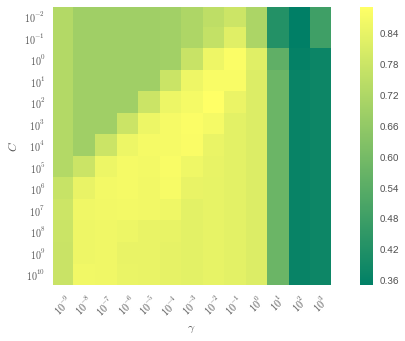

In [5]:
grid_search_svm_rbf(X_scaled, y, fig_path=fig_dir+'heat_gridsearch_svm_rbf.pdf',
                            pickle_path='../pickle/04_learning_curves/grid_scores_svm_rbf.pickle')

The best parameters for the Linear SVM are `{multi_class='ovr', loss='squared_hinge', penalty='l1', C=0.1}`:

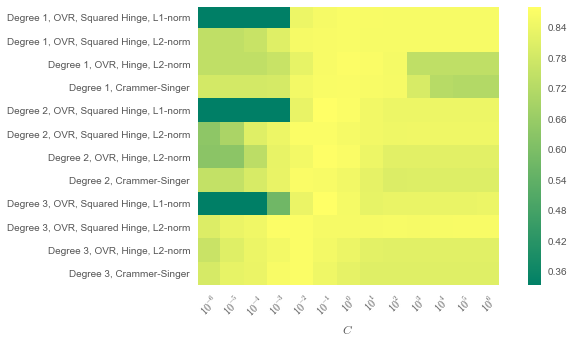

In [7]:
grid_search_svm_poly(X_scaled, y, fig_path=fig_dir+'heat_gridsearch_svm_poly.pdf',
                             pickle_path='../pickle/04_learning_curves/grid_scores_svm_poly.pickle')

The best parameters for logistic regression are `{multi_class='ovr', penalty='l1', C=1}`.

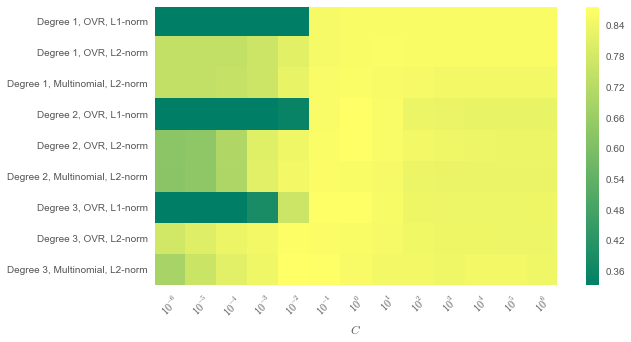

In [15]:
grid_search_logistic(X_scaled, y, fig_path=fig_dir+'heat_gridsearch_logistic.pdf',
                             pickle_path='../pickle/04_learning_curves/grid_scores_logistic.pickle')

## Learning Curves

In [46]:
mclearn.compute_all_learning_curves(sdss, feature_cols, target_col)

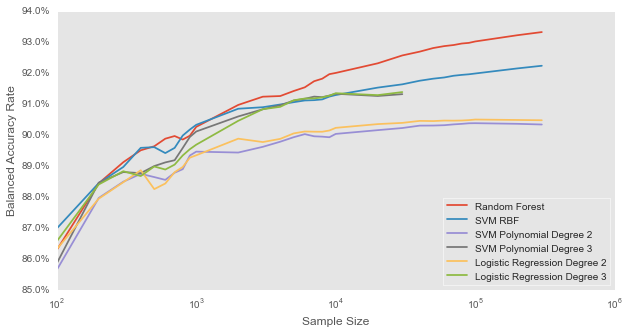

In [9]:
learning_curves = []
sample_sizes = np.concatenate((np.arange(100, 1000, 100), np.arange(1000, 10000, 1000),
                               np.arange(10000, 100001, 10000), [200000, 300000]))
curve_labels = ['Random Forest', 'SVM RBF', 'SVM Polynomial Degree 2', 'SVM Polynomial Degree 3',
                'Logistic Regression Degree 2', 'Logistic Regression Degree 3']
lc_pickles = ['../pickle/04_learning_curves/lc_forest.pickle',
              '../pickle/04_learning_curves/lc_svm_rbf.pickle',
              '../pickle/04_learning_curves/lc_svm_poly_2.pickle',
              '../pickle/04_learning_curves/lc_svm_poly_3.pickle',
              '../pickle/04_learning_curves/lc_logistic_2.pickle',
              '../pickle/04_learning_curves/lc_logistic_3.pickle']

for lc_pickle in lc_pickles:
    with open(lc_pickle, 'rb') as f:
        learning_curves.append(pickle.load(f))

fig = plt.figure(figsize=(10, 5))
ax = plot_learning_curve(sample_sizes, learning_curves, curve_labels)
fig.savefig(fig_dir + 'learning_curves.pdf', bbox_inches='tight')

Note that the learning cuves for SVM and Logistic Regression with polynomial degree 3 stop early. This is simply because I didn't have enough memory in my machine to go any further. In any case, these two curves look like they are flattening out any way.